In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 
mpl.rcParams['font.size'] = 7


df = pd.read_excel('default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [2]:
print(df.shape) # number of lines and columns

print(df.columns) # nome of the columns

(30000, 25)
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


- Columns:
  - ID (String): Identifier
  - LIMIT_BAL(Num): Received credit in Taiwanese dollars (individual and familiar)
  - SEX(Cat): Gen (1:Man, 2:Woman)
  - EDUCATION: (1:Pos-grad,2:university,3:highSchool, 4:Another) (ordinal variable 1 > 2 > 3 > 4)
  - MARRIAGE: (1:Alone,2:Married,3:Another)
  - AGE: Age
  - PAY_1-6: Past payments (September - April) (-2:whithout value to pay,-1:everything paid,0:Not everything paid,1: one month late, 2: two month late ...)
  - BILL_AMT_1-6: Value of the bill (September - April)
  - PAY_AMT_1-6: Payed value of the bill (September - April)
  - default payment next month: (1:Dont pay the next month, 0: pay the next month)

In [3]:
df.head()  

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df['ID'].nunique() # Number of unique ids 

# the number < 30000, so exists id duplicates

29687

In [5]:
id_count = df['ID'].value_counts() # groupby/count

print(id_count.head(5)) 

id_count.value_counts() # number of repetitions, index become the key (ID)


ID
7d5f3242-e1df    2
1b22b0ab-aba3    2
4cb27699-fe3f    2
91c69d1a-8732    2
bf23c70b-bf12    2
Name: count, dtype: int64


count
1    29374
2      313
Name: count, dtype: int64

In [6]:
mask_id_bt2 = id_count >= 2  # boolean mask for ids who have more tha one repetition

print(mask_id_bt2[0:5])

ids_dupe = list(id_count.index[mask_id_bt2]) # List of duplicated ids

ids_dupe[0:5]


ID
7d5f3242-e1df    True
1b22b0ab-aba3    True
4cb27699-fe3f    True
91c69d1a-8732    True
bf23c70b-bf12    True
Name: count, dtype: bool


['7d5f3242-e1df',
 '1b22b0ab-aba3',
 '4cb27699-fe3f',
 '91c69d1a-8732',
 'bf23c70b-bf12']

In [7]:
df.loc[df['ID'].isin(ids_dupe)].head(4) # use loc (use the ID)  to find (by a boolean mask generated by isin) the duplicated IDS in the dataframe

# One of the duplicates have all the columns equal zero



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
141,26bde6da-f148,180000,1,2,2,28,-1,-1,-1,-1,...,332,416,416,0,416,332,500,3500,832,0
196,42009c72-651f,150000,2,2,1,34,-2,-2,-2,-2,...,116,0,1500,0,0,116,0,1500,0,0
241,26bde6da-f148,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,42009c72-651f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_zero_mask_matrix = df == 0 # create a matrix of the full dataframe

print(df_zero_mask_matrix.head())

mask_all_zero = df_zero_mask_matrix.iloc[:,1:].all(axis=1) # for each line verify if all columns are zero (except 1) and generate a boolean vector (all() verify if all elements of the axis is true and return true)

print(mask_all_zero.head())

print(sum(mask_all_zero))  # sum of all true (1) results (represents number of lines picked)

df_clean1 = df.loc[~mask_all_zero, :].copy() # erase all duplicated lines with only zeros



      ID  LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  PAY_1  PAY_2  PAY_3  \
0  False      False  False      False     False  False  False  False  False   
1  False      False  False      False     False  False  False  False   True   
2  False      False  False      False     False  False   True   True   True   
3  False      False  False      False     False  False   True   True   True   
4  False      False  False      False     False  False  False   True  False   

   PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  False  ...       True       True       True      True     False      True   
1   True  ...      False      False      False      True     False     False   
2   True  ...      False      False      False     False     False     False   
3   True  ...      False      False      False     False     False     False   
4   True  ...      False      False      False     False     False     False   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default pay

In [9]:
df_clean1.info() # Not-null, but maybe exists some default value for null (or some errors, so lets see the histogram)

# "PAY_1 Object ?"

payments = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# two values who doesnt exists in the dicionary ('Not avaliable')
# Only "PAY_1" has 'Not avaliable'

for payment in payments:
   print(df_clean1[payment].value_counts().head())

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [10]:
valid_pay_mask = df_clean1['PAY_1'] != 'Not available'  # lines whithout "Not available"

print(sum(valid_pay_mask)) # number of lines remaining

df_clean2 = df_clean1.loc[valid_pay_mask, :].copy() # erasing "Not available" lines

df_clean2['PAY_1'] = df_clean2['PAY_1'].astype('int64')  # converting object to int

26664


                AGE      LIMIT_BAL
count  26664.000000   26664.000000
mean      35.505213  167919.054905
std        9.227442  129839.453081
min       21.000000   10000.000000
25%       28.000000   50000.000000
50%       34.000000  140000.000000
75%       41.000000  240000.000000
max       79.000000  800000.000000


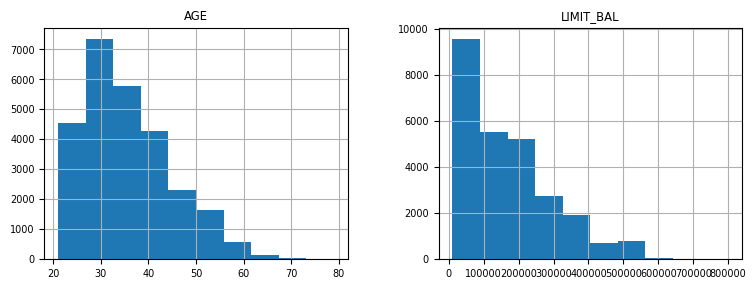

In [11]:
df_clean2[['AGE', 'LIMIT_BAL']].hist(figsize=(9,3)) # histogram of numeric columns
print(df_clean2[['AGE', 'LIMIT_BAL']].describe()) # some basic statistics

In [12]:
print(df_clean2['EDUCATION'].value_counts()) # label distribution 

# not knowed labels 0, 5 and 6, so lets put the on other category (4)

df_clean2['EDUCATION'] = df_clean2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4) # replace 0,5 and 6 by 4

df_clean2['EDUCATION'].value_counts()


EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64


EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [13]:
print(df_clean2['MARRIAGE'].value_counts()) # label distribution 

df_clean2['MARRIAGE'] = df_clean2['MARRIAGE'].replace(to_replace= 0,value= 3) # replace 0, by 3

print(df_clean2['MARRIAGE'].value_counts())


MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64
MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64


Text(0.5, 0, 'Education level: ordinal encoding')

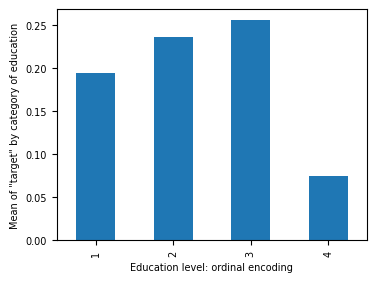

In [14]:
df_clean2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(figsize=(4,3),legend=False)
plt.ylabel('Mean of "target" by category of education')
plt.xlabel('Education level: ordinal encoding')

# we can see that the relationship is not linear (because of the class 4)
# some algorithms assume a linear relationship between the target and the the variable (its interesting verify if is true)


In [15]:
# if we use One hot encoding on EDUCATION, the algorithm will treat individually each category 

df_clean2['EDUCATION_CAT'] = None

education_map = {  # map of the categorys
   1: 'pos_graduate',
   2: 'university',
   3: 'high_school',
   4: 'another'
}

df_clean2['EDUCATION_CAT'] = df_clean2['EDUCATION'].map(education_map) # create a serie using the map and replacing

edu_onehot = pd.get_dummies(df_clean2['EDUCATION_CAT'])  # return a dataframe with one colunm for each category (one hot encoding)

print(edu_onehot)


df_clean3 = pd.concat([df_clean2, edu_onehot], axis=1) # concatenate

df_clean3.head(2)



       another  high_school  pos_graduate  university
0        False        False         False        True
1        False        False         False        True
2        False        False         False        True
3        False        False         False        True
4        False        False         False        True
...        ...          ...           ...         ...
29995    False         True         False       False
29996    False         True         False       False
29997    False        False         False        True
29998    False         True         False       False
29999    False        False         False        True

[26664 rows x 4 columns]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,another,high_school,pos_graduate,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,False,False,False,True
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,False,False,False,True


array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

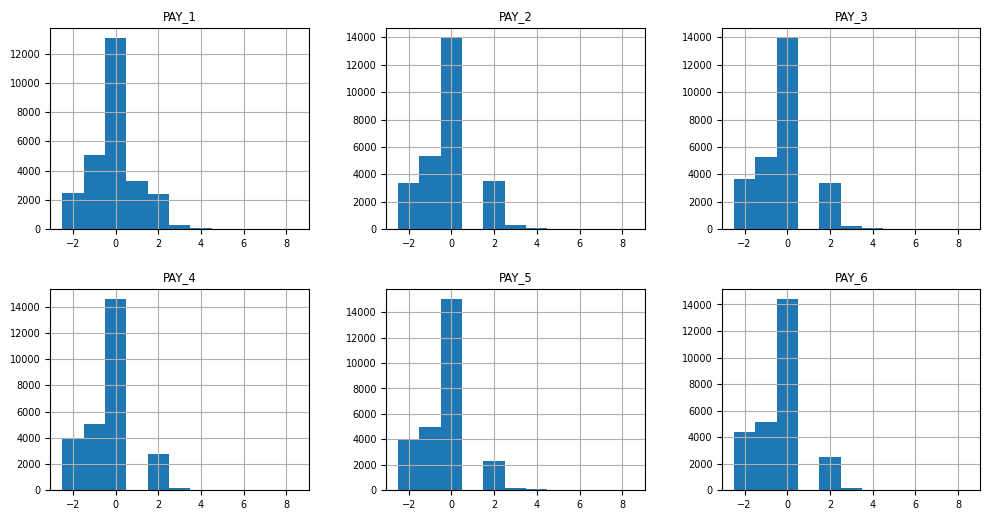

In [16]:
pay_status = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

df_clean3[pay_status].describe()

pay_1_bins = np.array(range(-2,10)) - 0.5 # bins of axis x (vertical lines)

df_clean3[pay_status].hist(figsize=(12,6), layout=(2,3), bins=pay_1_bins)

# something is wrong, how come there are so many two months late and none one month late in the previous month ? 
# Only 'PAY_1' are correct

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


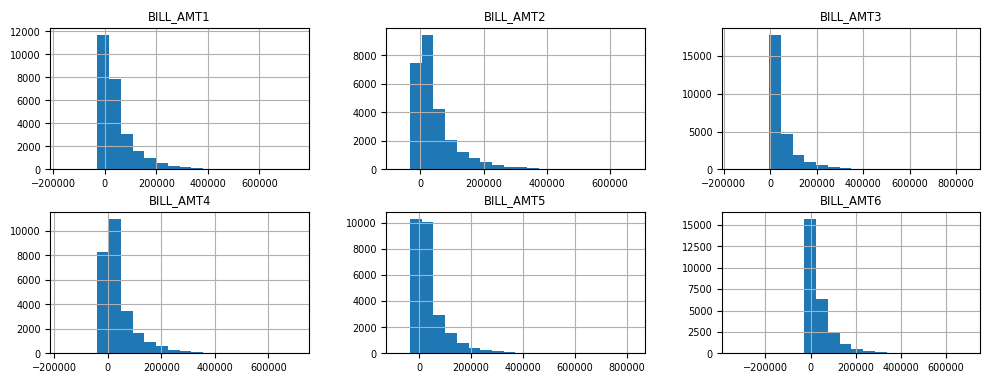

In [17]:
pay_amount = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

bill_amount = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

df_clean3[bill_amount].hist(bins=20,figsize=(12,9), layout=(4,3))
df_clean3[bill_amount].describe()


,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


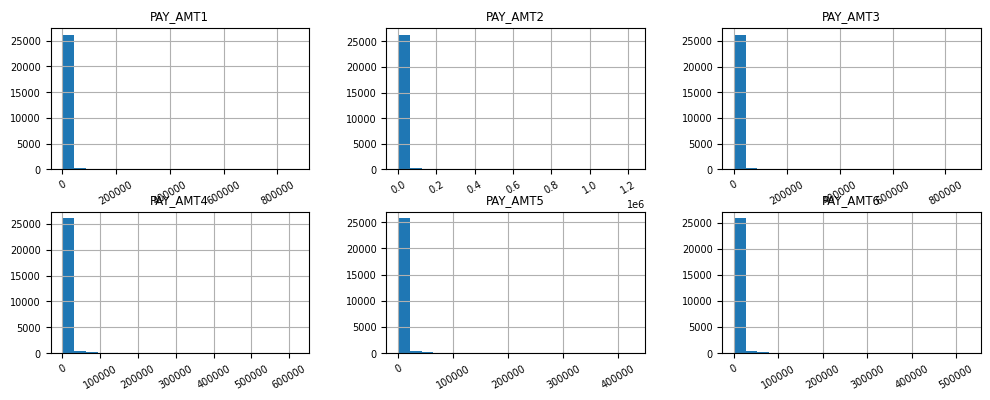

In [18]:
df_clean3[pay_amount].hist(xrot=30,bins=20,figsize=(12,9), layout=(4,3)) # a lot of values 0 ? not, its not normalized (the max value is much bigger than the mean)
df_clean3[pay_amount].describe()

In [19]:
mask_zero_pay_amt = df_clean3[pay_amount] == 0 # return a dataframe mask 

mask_zero_pay_amt.sum(axis=0) # sum of each column


PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

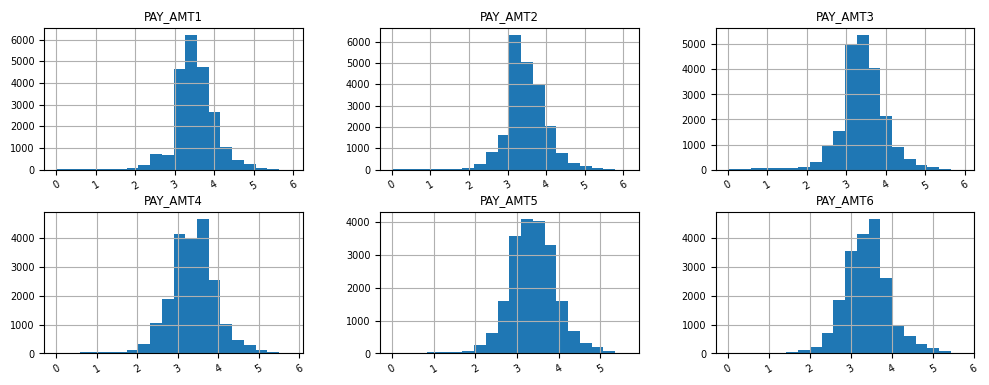

In [20]:
df_clean3[pay_amount][~mask_zero_pay_amt].apply(np.log10).hist(xrot=30,bins=20,figsize=(12,9), layout=(4,3))

In [22]:
df_clean3.head()


df_clean3.to_csv('clean_data.csv', sep=';', index=False)